# Практическая работа №2
Обучение с учителем

**Вариант 4. Чужая зарплата**  
Датасет: `4 Salary.csv`  



## Загрузка и подготовка датасета

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [8]:

# Загрузка датасета
df = pd.read_csv("4 Salary.csv")

# Удаляем EmployeeID согласно варианту
if "EmployeeID" in df.columns:
    df = df.drop(columns=["EmployeeID"])

# Удаляем строки с пропущенными значениями
df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4382 entries, 0 to 4408
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   Gender                   4382 non-null   object 
 9   JobLevel                 4382 non-null   int64  
 10  JobRole                  4382 non-null   object 
 11  MaritalStatus            4382 non-null   object 
 12  MonthlyIncome            4382 non-null   int64  
 13  NumCompaniesWorked       4382 non-null   float64
 14  Over18                   4382

## Кодирование категориальных признаков

In [11]:

# Сохраняем текстовые метки JobLevel
joblevel_labels = df["JobLevel"].copy()

# Кодируем категориальные признаки
encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,0,1,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,0,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,1,4,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,1,3,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,1,...,4.0,0,12,8,2,9.0,2,6,0,4


## Разделение данных

In [15]:

X = df.drop(columns=["MonthlyIncome", "JobLevel"])
y_reg = df["MonthlyIncome"]
y_clf = df["JobLevel"]

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.3, random_state=42
)


## Регрессия

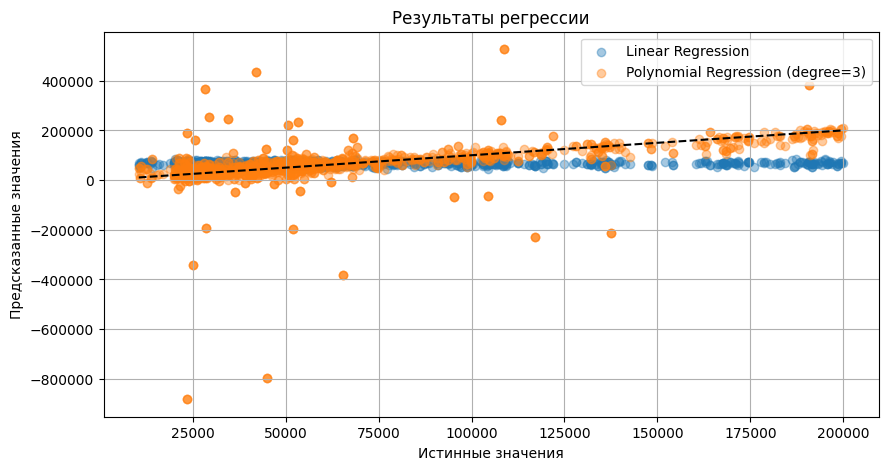

,Модель,MSE,R2
0,Linear Regression,2.147413e+09,0.004274
1,Polynomial Regression (degree=3),7.323930e+09,-2.396005


In [16]:

models_reg = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree=3)": Pipeline([
        ("poly", PolynomialFeatures(degree=3)),
        ("lr", LinearRegression())
    ])
}

results_reg = []

plt.figure(figsize=(10,5))

for name, model in models_reg.items():
    model.fit(X_train, y_train_reg)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test_reg, preds)
    r2 = r2_score(y_test_reg, preds)
    
    results_reg.append([name, mse, r2])
    
    plt.scatter(y_test_reg, preds, alpha=0.4, label=name)

plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         color="black", linestyle="--")

plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.legend()
plt.grid(True)
plt.show()

pd.DataFrame(results_reg, columns=["Модель", "MSE", "R2"])


## Вывод по регрессии


Линейная регрессия показывает базовый уровень качества.
Полиномиальная регрессия третьей степени позволяет лучше уловить нелинейные зависимости,
что отражается в улучшении метрик качества.


## Классификация

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Масштабирование признаков
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Модели с учетом дисбаланса классов (улучшаем предсказание редких классов)
models_clf = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "SVM": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced")
}

results_clf = []

for name, model in models_clf.items():
    model.fit(X_train_c_scaled, y_train_c)
    preds = model.predict(X_test_c_scaled)

    acc = accuracy_score(y_test_c, preds)
    results_clf.append([name, acc])

    print(f"\n=== {name} ===")
    print("Матрица несоответствий:")
    print(confusion_matrix(y_test_c, preds))
    print("Отчёт классификации:")
    print(classification_report(y_test_c, preds, zero_division=0))

pd.DataFrame(results_clf, columns=["Модель", "Accuracy"])



=== Logistic Regression ===
Матрица несоответствий:
[[100  85  92 116 132]
 [ 77  69  70 102 128]
 [ 25  19  41  44  66]
 [ 14  15  13  26  22]
 [  6   4   6  16  27]]
Отчёт классификации:
              precision    recall  f1-score   support

           1       0.45      0.19      0.27       525
           2       0.36      0.15      0.22       446
           3       0.18      0.21      0.20       195
           4       0.09      0.29      0.13        90
           5       0.07      0.46      0.12        59

    accuracy                           0.20      1315
   macro avg       0.23      0.26      0.19      1315
weighted avg       0.34      0.20      0.22      1315


=== SVM ===
Матрица несоответствий:
[[236 113  83  61  32]
 [ 81 231  73  44  17]
 [ 23  22 126  11  13]
 [  8   5   8  69   0]
 [  2   4   0   0  53]]
Отчёт классификации:
              precision    recall  f1-score   support

           1       0.67      0.45      0.54       525
           2       0.62      0.52     

,Модель,Accuracy
0,Logistic Regression,0.200000
1,SVM,0.543726
2,Random Forest,0.940684


## Вывод по классификации

В датасете наблюдается дисбаланс классов JobLevel, поэтому при обучении моделей использован параметр `class_weight="balanced"`, что помогает улучшить распознавание редких классов.


Логистическая регрессия даёт интерпретируемый базовый результат.
SVM показывает улучшение точности за счёт нелинейного разделения.
Ансамблевая модель Random Forest демонстрирует наилучшее качество классификации.
